EE4802 - Learning From Data - House Price Prediction Model


Aditi Chadha - A0226612M


In [1]:
!pip uninstall scikit-learn -y 
!pip install -U scikit-learn # Installing latest version

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


Mounting the drive so the data files can be accessed

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd 
import glob
data = pd.concat(map(pd.read_csv, glob.glob("/content/drive/MyDrive/Data Files/*.csv")))
# The above .csv files include data from 1990 to 2023.
# This data is contained in a total of 5 files namely:
# 1990-1999.csv
# 2000-feb-2012.csv
# Mar-2012-to-Dec-2014.csv
# Jan-2015-to-Dec-2016
# Jan-2017-onwards.csv

Checking the total number of columns and rows in the data-set

In [4]:
data.shape

(894203, 11)

Checking the data types of the data values in the different columns before processing the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894203 entries, 0 to 369650
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                894203 non-null  object 
 1   town                 894203 non-null  object 
 2   flat_type            894203 non-null  object 
 3   block                894203 non-null  object 
 4   street_name          894203 non-null  object 
 5   storey_range         894203 non-null  object 
 6   floor_area_sqm       894203 non-null  float64
 7   flat_model           894203 non-null  object 
 8   lease_commence_date  894203 non-null  int64  
 9   remaining_lease      185153 non-null  object 
 10  resale_price         894203 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 81.9+ MB


Checking for any null values in the data-set

In [6]:
data.dtypes
data.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease        709050
resale_price                0
dtype: int64

Re-checking the data types for some columns and calculating the remaining lease years for all the data points/houses.

In [7]:
data['resale_price'] = data['resale_price'].astype('float')
data['floor_area_sqm'] = data['floor_area_sqm'].astype('float')
data['lease_commence_date'] = data['lease_commence_date'].astype('int64')
data['lease_remain_years'] = 99 - (2023 - data['lease_commence_date'])
data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
lease_remain_years       int64
dtype: object

Checking if the "lease_remain_years" column was added to the data-set after the above data-processing.

In [8]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,62
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,57
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,56
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,55
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,NaN,476888.0,61
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,NaN,490000.0,62
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,NaN,488000.0,64
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,NaN,705000.0,68


In [9]:
data.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease        709050
resale_price                0
lease_remain_years          0
dtype: int64

In order to find the median of the storey range, we need the statistics module, which is part of Python's standard library.

**get_median()** is a Python function that takes a single argument x, which is expected to be a string representing a range of numerical values separated by the string ' TO '. Example: *07 TO 09*

The function first splits the input string x using the ' TO ' delimiter and creates a new list float_list by converting each split value from a string to a floating-point number using a list comprehension.

The function then uses the statistics.median function to calculate the median of the float_list and returns the result.



In [10]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median


The below code creates a new column storey_median in the existing DataFrame => "data". The apply() method is used to apply the get_median function to each element in the storey_range column, and store the resulting medians in the newly created column-storey_median.

In [11]:
data['storey_median'] = data['storey_range'].apply(lambda x: get_median(x))
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years,storey_median
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,62,8.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,57,2.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,56,2.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,55,2.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,56,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,NaN,476888.0,61,11.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,NaN,490000.0,62,2.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,NaN,488000.0,64,2.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,NaN,705000.0,68,8.0


Checking if the storey-median column was added to the DataFrame "Data" by printing the first five entries of the data-set.

In [12]:
data.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years,storey_median
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,62,8.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,57,2.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,56,2.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,55,2.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,56,8.0


For simplicity, the columns "block", "street_name" and "remaining_lease" are dropped from the data set.

In [13]:
trim_data = data.drop(["block", "street_name", "remaining_lease"], axis=1) 
trim_data

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_median
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,255000.0,62,8.0
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,275000.0,57,2.0
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,285000.0,56,2.0
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,290000.0,55,2.0
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,290000.0,56,8.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,10 TO 12,121.0,Improved,1985,476888.0,61,11.0
369647,2012-02,YISHUN,5 ROOM,01 TO 03,122.0,Improved,1986,490000.0,62,2.0
369648,2012-02,YISHUN,5 ROOM,01 TO 03,122.0,Improved,1988,488000.0,64,2.0
369649,2012-02,YISHUN,EXECUTIVE,07 TO 09,181.0,Apartment,1992,705000.0,68,8.0


Another dataframe called "trim_data_correlation" is created with the relevant columns from the trim_data data set. These include 'floor_area_sqm', 'lease_remain_years', 'storey_median' and 'resale_price'. 

This trim_data_correlation data frame will be used subsequently to get the correlation between the variables in the dataframe.

In [14]:
trim_data_correlation = trim_data[['floor_area_sqm','lease_remain_years','storey_median','resale_price']]
trim_data_correlation

,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,60.0,62,8.0,255000.0
1,68.0,57,2.0,275000.0
2,69.0,56,2.0,285000.0
3,68.0,55,2.0,290000.0
4,68.0,56,8.0,290000.0
...,...,...,...,...
369646,121.0,61,11.0,476888.0
369647,122.0,62,2.0,490000.0
369648,122.0,64,2.0,488000.0
369649,181.0,68,8.0,705000.0


The following code drops duplicates (if any) from the dataframe and then prints the resulting dataframe.

In [15]:
trim_data_correlation = trim_data_correlation.drop_duplicates()
trim_data_correlation

,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,60.0,62,8.0,255000.0
1,68.0,57,2.0,275000.0
2,69.0,56,2.0,285000.0
3,68.0,55,2.0,290000.0
4,68.0,56,8.0,290000.0
...,...,...,...,...
369638,121.0,63,2.0,437500.0
369640,127.0,64,5.0,515000.0
369641,129.0,64,11.0,475000.0
369645,121.0,61,5.0,503000.0


In [16]:
trim_data_correlation.dtypes

floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

The following code uses the seaborn library to create a heatmap of the correlation matrix of trim_data_correlation dataframe.

The correlation matrix of the trim_data_correlation DataFrame is calculated using the .corr() method. The resulting correlation matrix is stored in a variable called corrMatrix.

The sns.heatmap() function is used to create a heatmap of the correlation matrix. 

The resulting heatmap is a visual representation of the correlation matrix, with each cell representing the correlation coefficient between two variables. Darker colors indicate stronger positive correlations, while lighter colors indicate weaker or negative correlations. The diagonal line of the heatmap is always a solid color, as it represents the correlation between a variable and itself, which is always 1. The heatmap can be useful for identifying patterns in the data and determining which variables are correlated.

<AxesSubplot:>

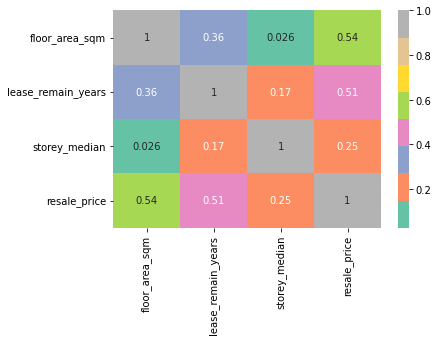

In [17]:
import seaborn as sns

corrMatrix = trim_data_correlation.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='Set2',
        annot=True)

The heatmap was useful for identifying patterns in the data and determining which variables are correlated. Now, we will process the data to prepare the final data set which will be used to train and test the model.

In [18]:
from sklearn.preprocessing import OrdinalEncoder 
encoder = OrdinalEncoder() 
encoder.fit_transform(data[["flat_model"]]) 
encoder.categories_

[array(['2-ROOM', '2-room', '3Gen', 'APARTMENT', 'Adjoined flat',
        'Apartment', 'DBSS', 'IMPROVED', 'IMPROVED-MAISONETTE', 'Improved',
        'Improved-Maisonette', 'MAISONETTE', 'MODEL A',
        'MODEL A-MAISONETTE', 'MULTI GENERATION', 'Maisonette', 'Model A',
        'Model A-Maisonette', 'Model A2', 'Multi Generation',
        'NEW GENERATION', 'New Generation', 'PREMIUM APARTMENT',
        'Premium Apartment', 'Premium Apartment Loft',
        'Premium Maisonette', 'SIMPLIFIED', 'STANDARD', 'Simplified',
        'Standard', 'TERRACE', 'Terrace', 'Type S1', 'Type S2'],
       dtype=object)]

The 'flat_model' column as shown above has inconsistent data which differs by Upper case and smaller case. Eg: '2-room' and '2-ROOM'.

To make the data consistent, the following code converts all 'flat_model' the data to lower case.

In [19]:
trim_data['flat_model'] = trim_data['flat_model'].apply(str.lower)
trim_data = trim_data.drop(["lease_remain_years", "storey_median"], axis=1) 
trim_data.head(5) #printing 5 entries to check if the data is converted to lower case.

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,new generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,new generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,new generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,new generation,1980,290000.0


Regression is performed on numerical data, but not all of the data we have is numerical. For this data, we will need to transform into numerical values. . 
The non-numerical data in our data set includes the data fields -
["month", "flat_type", "storey_range", "town", "flat_model"]  


In [20]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
pipeline = ColumnTransformer([ 
("o", OrdinalEncoder(), ["month","flat_type","storey_range"]), 
("n", OneHotEncoder(), ["town", "flat_model"]), 
], remainder='passthrough') 
X_with_resale_price = pipeline.fit_transform(trim_data) 
y = trim_data["resale_price"] 


In [21]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
pipeline = ColumnTransformer([ 
("o", OrdinalEncoder(), ["month","flat_type","storey_range"]), 
("n", OneHotEncoder(), ["town", "flat_model"]), 
], remainder='passthrough') 
X = pipeline.fit_transform(trim_data.drop(["resale_price"], axis=1)) 
y = trim_data["resale_price"] 

X contains all the data fields except the 'resale_price' column, however, X_with_resale_price contains all the data fields with the 'resale_price' column.

In [22]:
X.shape

(894203, 53)

In [23]:
X_with_resale_price.shape

(894203, 54)

In [24]:
encoder = OrdinalEncoder() 
encoder.fit_transform(data[["town"]]) 
encoder.categories_

[array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
        'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
        'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
        'KALLANG/WHAMPOA', 'LIM CHU KANG', 'MARINE PARADE', 'PASIR RIS',
        'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON',
        'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)]

In [25]:
encoder = OrdinalEncoder() 
encoder.fit_transform(data[["month"]]) 
encoder.categories_

[array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
        '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
        '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
        '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
        '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
        '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
        '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
        '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
        '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
        '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
        '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
        '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
        '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
        '1996-07', '1996-08', '1996-09

In [26]:
encoder = OrdinalEncoder() 
encoder.fit_transform(trim_data[["storey_range"]]) 
encoder.categories_

[array(['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
        '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
        '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
        '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
        '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'],
       dtype=object)]

In [27]:
encoder = OrdinalEncoder() 
encoder.fit_transform(trim_data[["flat_type"]]) 
encoder.categories_

[array(['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
        'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)]

In [28]:
encoder = OrdinalEncoder() 
encoder.fit_transform(trim_data[["flat_model"]]) 
encoder.categories_

[array(['2-room', '3gen', 'adjoined flat', 'apartment', 'dbss', 'improved',
        'improved-maisonette', 'maisonette', 'model a',
        'model a-maisonette', 'model a2', 'multi generation',
        'new generation', 'premium apartment', 'premium apartment loft',
        'premium maisonette', 'simplified', 'standard', 'terrace',
        'type s1', 'type s2'], dtype=object)]

Downloading the data files

In [29]:
from google.colab import files
data.to_csv('Complete_data.csv') 
files.download('Complete_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from google.colab import files
trim_data.to_csv('Trim_Data.csv', index = False)
files.download('Trim_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
from google.colab import files
trim_data_correlation.to_csv('Correlation_data.csv', index = False)
trim_data.to_csv('Correlation_data.csv', index = False)
files.download('Correlation_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Each transaction (i.e., row) contains 53 data fields (i.e., columns).
We will assign names to each column subsequently. 

In [32]:
X.toarray()[0] #checking the first entry of the data-set

array([3.000e+02, 2.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 6.000e+01, 1.986e+03])

Having prepared our data, we are now ready to perform regression on it. In the Python code below I perform linear regression and report the model 𝑅^2:

In [33]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() 
lr.fit(X, y) 
print("Intercept: ", lr.intercept_) 
print("Coefficient: ", lr.coef_) 
print("R-sq of model: ", lr.score(X, y))

Intercept:  -6334162.456204808
Coefficient:  [    845.43504934   41040.73349139    5582.07109283   17950.30133105
    7521.54862231   70289.91509922  -26712.24350379   76751.04059092
  -71297.67283541  102156.74814075   63058.51847715  -71688.20742874
   32309.93437463   29638.96891507  -25025.94230027  -26012.015541
  -57398.96460136   43572.95594543   -7545.29987161  103819.12402913
  -26160.51643569  -60601.98040557   76276.71142158 -108113.9927657
  -73478.7367901     6415.01398081   -3142.90447368   47994.08366223
  -84954.3564969   -35622.03114007  -29442.60517649    2677.2168179
  -66344.57377618  -58283.62995009   91753.30427272  -76888.45563992
   10083.90267484  -44813.0439939   -69904.95328862  -27879.42920211
  -93374.25946249 -105296.90782535  -68941.05248274  -68056.05672553
  102429.92772683   -3218.36056242  -82826.36810485  -75821.45152706
  147231.99285721  253753.69787582  263161.10549284    1899.78281385
    3139.81895261]
R-sq of model:  0.8287881265494992


Performing Decision Tree Regression on the data below and reporting the model 𝑅^2:

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=12, min_samples_leaf=1, random_state=0).fit(X, y)
print("R-sq of model: ", dtr.score(X, y))

R-sq of model:  0.9211873379843262


Let us now try to predict the Price of a House in Singapore.

In [35]:
import numpy as np 
input = np.zeros(53) 
input[0] = 2 #set month to Mar 2017
input[1] = 4 #set flat type to 5-Room
input[2] = 11 #set storey range to 25
input[22] = 1 #set town to Punggol
input[47] = 1 #set flat model to Standard
input[51] = 80 #set floor area to 80 sqm
input[52] = 2001 #set lease commencement to 2001
print(input) 
print("Estimated resale price (linear regression)=> ", lr.predict([input])) 
print("Estimated resale price (DT regression)=> ", dtr.predict([input]))

[2.000e+00 4.000e+00 1.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 8.000e+01 2.001e+03]
Estimated resale price (linear regression)=>  [328309.73905818]
Estimated resale price (DT regression)=>  [77097.88213628]


In [36]:
import pandas as pd
col_name = ["month","type","storey","AMK","BED","BIS","BBT","BMH","BPJ", 
 "BTM","CEN","CCK","CLE","GEY","HOU","JRE","JRW","KAL","LCK","MAR", 
 "PAS","PUN","QUE","SEM","SKG","SER","TAM","TOA","WOO", 
 "YIS","2-room","3Gen","Adjoined","Apartment","DBSS","Improved", 
 "Improved-M","Maisonette","Model A","Model A-M","Model A2", 
 "Multi Gen","New Gen","Premium Apt","P/.remium Apt Loft", 
 "Premium M","Simplified","Standard","Terrace","Type S1", 
 "Type S2","Area","Lease"] 
df_X = pd.DataFrame(X.toarray(),columns=col_name)
df_X.head(5)

,month,type,storey,AMK,BED,BIS,BBT,BMH,BPJ,BTM,...,Premium Apt,P/.remium Apt Loft,Premium M,Simplified,Standard,Terrace,Type S1,Type S2,Area,Lease
0,300.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,1986.0
1,300.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1981.0
2,300.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,1980.0
3,300.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1979.0
4,300.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1980.0


In [37]:
import pandas as pd
colss_name = ["month","type","storey","AMK","BED","BIS","BBT","BMH","BPJ", 
 "BTM","CEN","CCK","CLE","GEY","HOU","JRE","JRW","KAL","LCK","MAR", 
 "PAS","PUN","QUE","SEM","SKG","SER","TAM","TOA","WOO", 
 "YIS","2-room","3Gen","Adjoined","Apartment","DBSS","Improved", 
 "Improved-M","Maisonette","Model A","Model A-M","Model A2", 
 "Multi Gen","New Gen","Premium Apt","P/.remium Apt Loft", 
 "Premium M","Simplified","Standard","Terrace","Type S1", 
 "Type S2","Area","Lease","resale_price"] 
df_Xy = pd.DataFrame(X_with_resale_price.toarray(),columns=colss_name)
df_Xy.head(5)

,month,type,storey,AMK,BED,BIS,BBT,BMH,BPJ,BTM,...,P/.remium Apt Loft,Premium M,Simplified,Standard,Terrace,Type S1,Type S2,Area,Lease,resale_price
0,300.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,1986.0,255000.0
1,300.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1981.0,275000.0
2,300.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,1980.0,285000.0
3,300.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1979.0,290000.0
4,300.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1980.0,290000.0


Before we finalize our model, it is important we do some model validation.

The code below uses the train_test_split() function from the Scikit-learn library to split a dataset into training and testing sets for machine learning.

The X_with_resale_price variable contains the feature matrix and target variable as a single NumPy array.

The code first uses NumPy's asarray function to convert the feature matrix of X_with_resale_price to a NumPy array and then selects all but the last column using the slicing operation [:,:-1]. This creates a new NumPy array X_input containing only the feature values.

The last column of X_with_resale_price is selected using the slicing operation [:,-1] and converted to a NumPy array Y_input, which contains only the target variable values, that is, "resale_price" values.

The train_test_split function is then called with the X_input and Y_input arrays as the input data, along with the random_state parameter set to 42. This ensures that the random split will be reproducible, and the test_size parameter set to 0.25 (which specifies that 25% of the data will be used for testing and the remaining 75% will be used for training).

The function returns four arrays: X_train and y_train, which contain the training data, and X_test and y_test, which contain the testing data.

In [38]:
from sklearn.model_selection import train_test_split
import numpy as np 

X_input=np.asarray(X_with_resale_price.toarray()[:,:-1])
Y_input=np.asarray(X_with_resale_price.toarray()[:,-1])

X_train, X_test, y_train, y_test=train_test_split(X_input,Y_input,random_state=42,test_size=0.25) #considering 25% of data for prediction purpose

In [39]:
import numpy as np 
input = np.zeros(53) 
input[0] = 265 #set month to Mar 2017
input[1] = 5 #set flat type to 5-Room
input[2] = 2 #set storey range to 25
input[24] = 1 #set town to Punggol
input[38] = 1 #set flat model to Standard
input[51] = 100 #set floor area to 80 sqm
input[52] = 1999 #set lease commencement to 2001
print(input) 
print("Estimated resale price (linear regression)=> ", lr.predict([input])) 
print("Estimated resale price (DT regression)=> ", dtr.predict([input]))

[2.650e+02 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+02 1.999e+03]
Estimated resale price (linear regression)=>  [429338.31908991]
Estimated resale price (DT regression)=>  [503887.44933365]


Performing Linear regression using training data and evaluating using test data:

In [40]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score 
lr = LinearRegression() 
lr.fit(X_train, y_train) 
print("R-sq of model: ", lr.score(X_train, y_train)) 
pred = lr.predict(X_test) 
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) 
print("R-sq of predictions: ", r2_score(y_test, pred))
print("MAPE of predictions: ", mean_absolute_percentage_error(y_test,pred))

R-sq of model:  0.8288982181215597
RMSE: 67285.94
R-sq of predictions:  0.8286519529833725
MAPE of predictions:  0.21506023009369243


Performing Decision Tree regression using training data and evaluating using test data:

Trying Decision Tree Regression with max_depth = 12

In [41]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score 
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=12, min_samples_leaf=1, random_state=0).fit(X_train, y_train) 
print("R-sq of model: ", dtr.score(X_train, y_train)) 
pred = dtr.predict(X_test) 
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) 
print("R-sq of predictions: ", r2_score(y_test, pred))
print("MAPE of predictions: ", mean_absolute_percentage_error(y_test,pred))

R-sq of model:  0.9215745706527093
RMSE: 46047.28
R-sq of predictions:  0.9197511923683699
MAPE of predictions:  0.1041027645438105


Trying Decision Tree Regression with max_depth = 20

In [42]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score 
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=20, min_samples_leaf=1, random_state=0).fit(X_train, y_train) 
print("R-sq of model: ", dtr.score(X_train, y_train)) 
pred = dtr.predict(X_test) 
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) 
print("R-sq of predictions: ", r2_score(y_test, pred))
print("MAPE of predictions: ", mean_absolute_percentage_error(y_test,pred))


R-sq of model:  0.9669144039359462
RMSE: 33878.22
R-sq of predictions:  0.9565618093101402
MAPE of predictions:  0.07668451867696556


Next, let's try Decision Tree Regression with max_depth = 8

In [43]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score 
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, min_samples_leaf=1, random_state=0).fit(X_train, y_train) 
print("R-sq of model: ", dtr.score(X_train, y_train)) 
pred = dtr.predict(X_test) 
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) 
print("R-sq of predictions: ", r2_score(y_test, pred))
print("MAPE of predictions: ", mean_absolute_percentage_error(y_test,pred))

R-sq of model:  0.875790912520412
RMSE: 57640.57
R-sq of predictions:  0.8742560365964344
MAPE of predictions:  0.13269276477615763


Next, let's try Decision Tree Regression with max_depth = 9

In [44]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score 
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, min_samples_leaf=1, random_state=0).fit(X_train, y_train) 
print("R-sq of model: ", dtr.score(X_train, y_train)) 
pred = dtr.predict(X_test) 
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) 
print("R-sq of predictions: ", r2_score(y_test, pred))
print("MAPE of predictions: ", mean_absolute_percentage_error(y_test,pred))

R-sq of model:  0.8899625735172076
RMSE: 54225.49
R-sq of predictions:  0.8887147868882482
MAPE of predictions:  0.12331797692029006


Trying Decision Tree Regression with max_depth = 30

In [45]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score 
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=30, min_samples_leaf=1, random_state=0).fit(X_train, y_train) 
print("R-sq of model: ", dtr.score(X_train, y_train)) 
pred = dtr.predict(X_test) 
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) 
print("R-sq of predictions: ", r2_score(y_test, pred))
print("MAPE of predictions: ", mean_absolute_percentage_error(y_test,pred))

R-sq of model:  0.9906391405568673
RMSE: 29898.60
R-sq of predictions:  0.9661676483148718
MAPE of predictions:  0.07001579020563503


Trying Decision Tree Regression with max_depth = 13

In [46]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score 
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=13, min_samples_leaf=1, random_state=0).fit(X_train, y_train) 
print("R-sq of model: ", dtr.score(X_train, y_train)) 
pred = dtr.predict(X_test) 
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) 
print("R-sq of predictions: ", r2_score(y_test, pred))
print("MAPE of predictions: ", mean_absolute_percentage_error(y_test,pred))

R-sq of model:  0.9297857032441806
RMSE: 43929.72
R-sq of predictions:  0.9269622448154543
MAPE of predictions:  0.09912259499055934


After observation, we conclude that the decision Regression Tree with Max_depth = 30 serves as the best model to predict the housing prices in Singapore as it maximizes the R^2 of model and predictions and minimizes the Mean Absolute Percentage Error. Values are given below:-


R-sq of model:  0.9906391405568673

RMSE: 29898.60

R-sq of predictions:  0.9661676483148718

MAPE of predictions:  0.07001579020563503

Modify the data below to predict the house price of any other house. Note that the indices represent the following:

Index      0 => month

Index      1 => flat_type 

Index      2 => Storey-range

Indices 3-29 => town

Indices 30-52 => flat_model

Index      53 => floor_area

Index      54 => lease_commencement_date


In [47]:
#FINAL MODEL

from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score 
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=30, min_samples_leaf=1, random_state=0).fit(X_train, y_train) 
print("R-sq of model: ", dtr.score(X_train, y_train)) 
pred = dtr.predict(X_test) 
print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) 
print("R-sq of predictions: ", r2_score(y_test, pred))
print("MAPE of predictions: ", mean_absolute_percentage_error(y_test,pred))

#Change values below 

import numpy as np 
input = np.zeros(53) 
input[0] = 331   # month
input[1] = 3     # flat_type
input[2] = 4     # storey_range
input[24] = 1    # town
input[38] = 1    # flat_model
input[51] = 100  # floor_area
input[52] = 1999 # lease_commencement_data
print(input)  
print("Estimated resale price (DT regression)=> ", dtr.predict([input]))

R-sq of model:  0.9906391405568673
RMSE: 29898.60
R-sq of predictions:  0.9661676483148718
MAPE of predictions:  0.07001579020563503
[3.310e+02 3.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+02 1.999e+03]
Estimated resale price (DT regression)=>  [406065.24237209]
